# Nigerian Music scraped from Spotify - an analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('nigerian-songs.csv')
df

name                         album   
0                      Sparky            Mandy & The Jungle  \
1                  shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                       LITT!                         LITT!   
3    Confident / Feeling Cool               Enjoy Your Life   
4                  wanted you                         rare.   
..                        ...                           ...   
525                   Kwaroro                       Kwaroro   
526             Concert Party                   Afro Escape   
527                      Loko                    Applaudise   
528                      Gift                    Applaudise   
529                    Macoma                    Applaudise   

                  artist artist_top_genre  release_date  length  popularity   
0          Cruel Santino  alternative r&b          2019  144000          48  \
1    Odunsi (The Engine)          afropop          2020   89488          30   
2                   AYLÃ˜        indie r&b          2018  207758          40   
3             Lady Donli     nigerian pop          2019  175135          14   
4    Odunsi (The Engine)          afropop          2018  152049          25   
..                   ...              ...           ...     ...         ...   
525           J. Martins   afro dancehall          2015  193960          10   
526      Various Artists   afro dancehall          2015  252708           0   
527               Iyanya   afro dancehall          2015  223159           0   
528               Iyanya   afro dancehall          2015  278280           0   
529               Iyanya   afro dancehall          2015  213426           0   

     danceability  acousticness  energy  instrumentalness  liveness  loudness   
0           0.666        0.8510   0.420          0.534000    0.1100    -6.699  \
1           0.710        0.0822   0.683          0.000169    0.1010    -5.640   
2           0.836        0.2720   0.564          0.000537    0.1100    -7.127   
3           0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4           0.702        0.1160   0.833          0.910000    0.3480    -6.044   
..            ...           ...     ...               ...       ...       ...   
525         0.735        0.6320   0.918          0.193000    0.0718    -2.582   
526         0.602        0.1770   0.883          0.000004    0.1190    -6.183   
527         0.729        0.2380   0.864          0.000000    0.1950    -3.942   
528         0.809        0.0490   0.806          0.000000    0.0659    -6.547   
529         0.816        0.1140   0.961          0.008500    0.1370    -2.204   

     speechiness    tempo  time_signature  
0         0.0829  133.015               5  
1         0.3600  129.993               3  
2         0.0424  130.005               4  
3         0.1130  111.087               4  
4         0.0447  105.115               4  
..           ...      ...             ...  
525       0.0355  127.954               4  
526       0.0778  154.010               4  
527       0.0668  121.058               4  
528       0.2340  123.997               4  
529       0.1390  106.972               4  

[530 rows x 16 columns]

lets extract the three genre

Text(0.5, 1.0, 'Top genres')

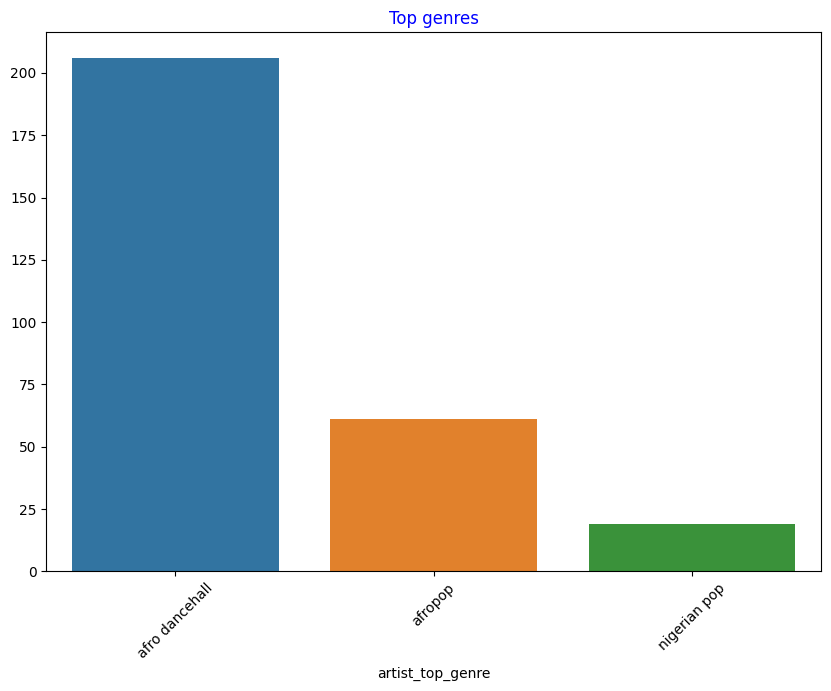

In [4]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

we now start by taking another look at the songs data.
- Create a boxplot, calling boxplot() for each column:

<Axes: xlabel='release_date'>

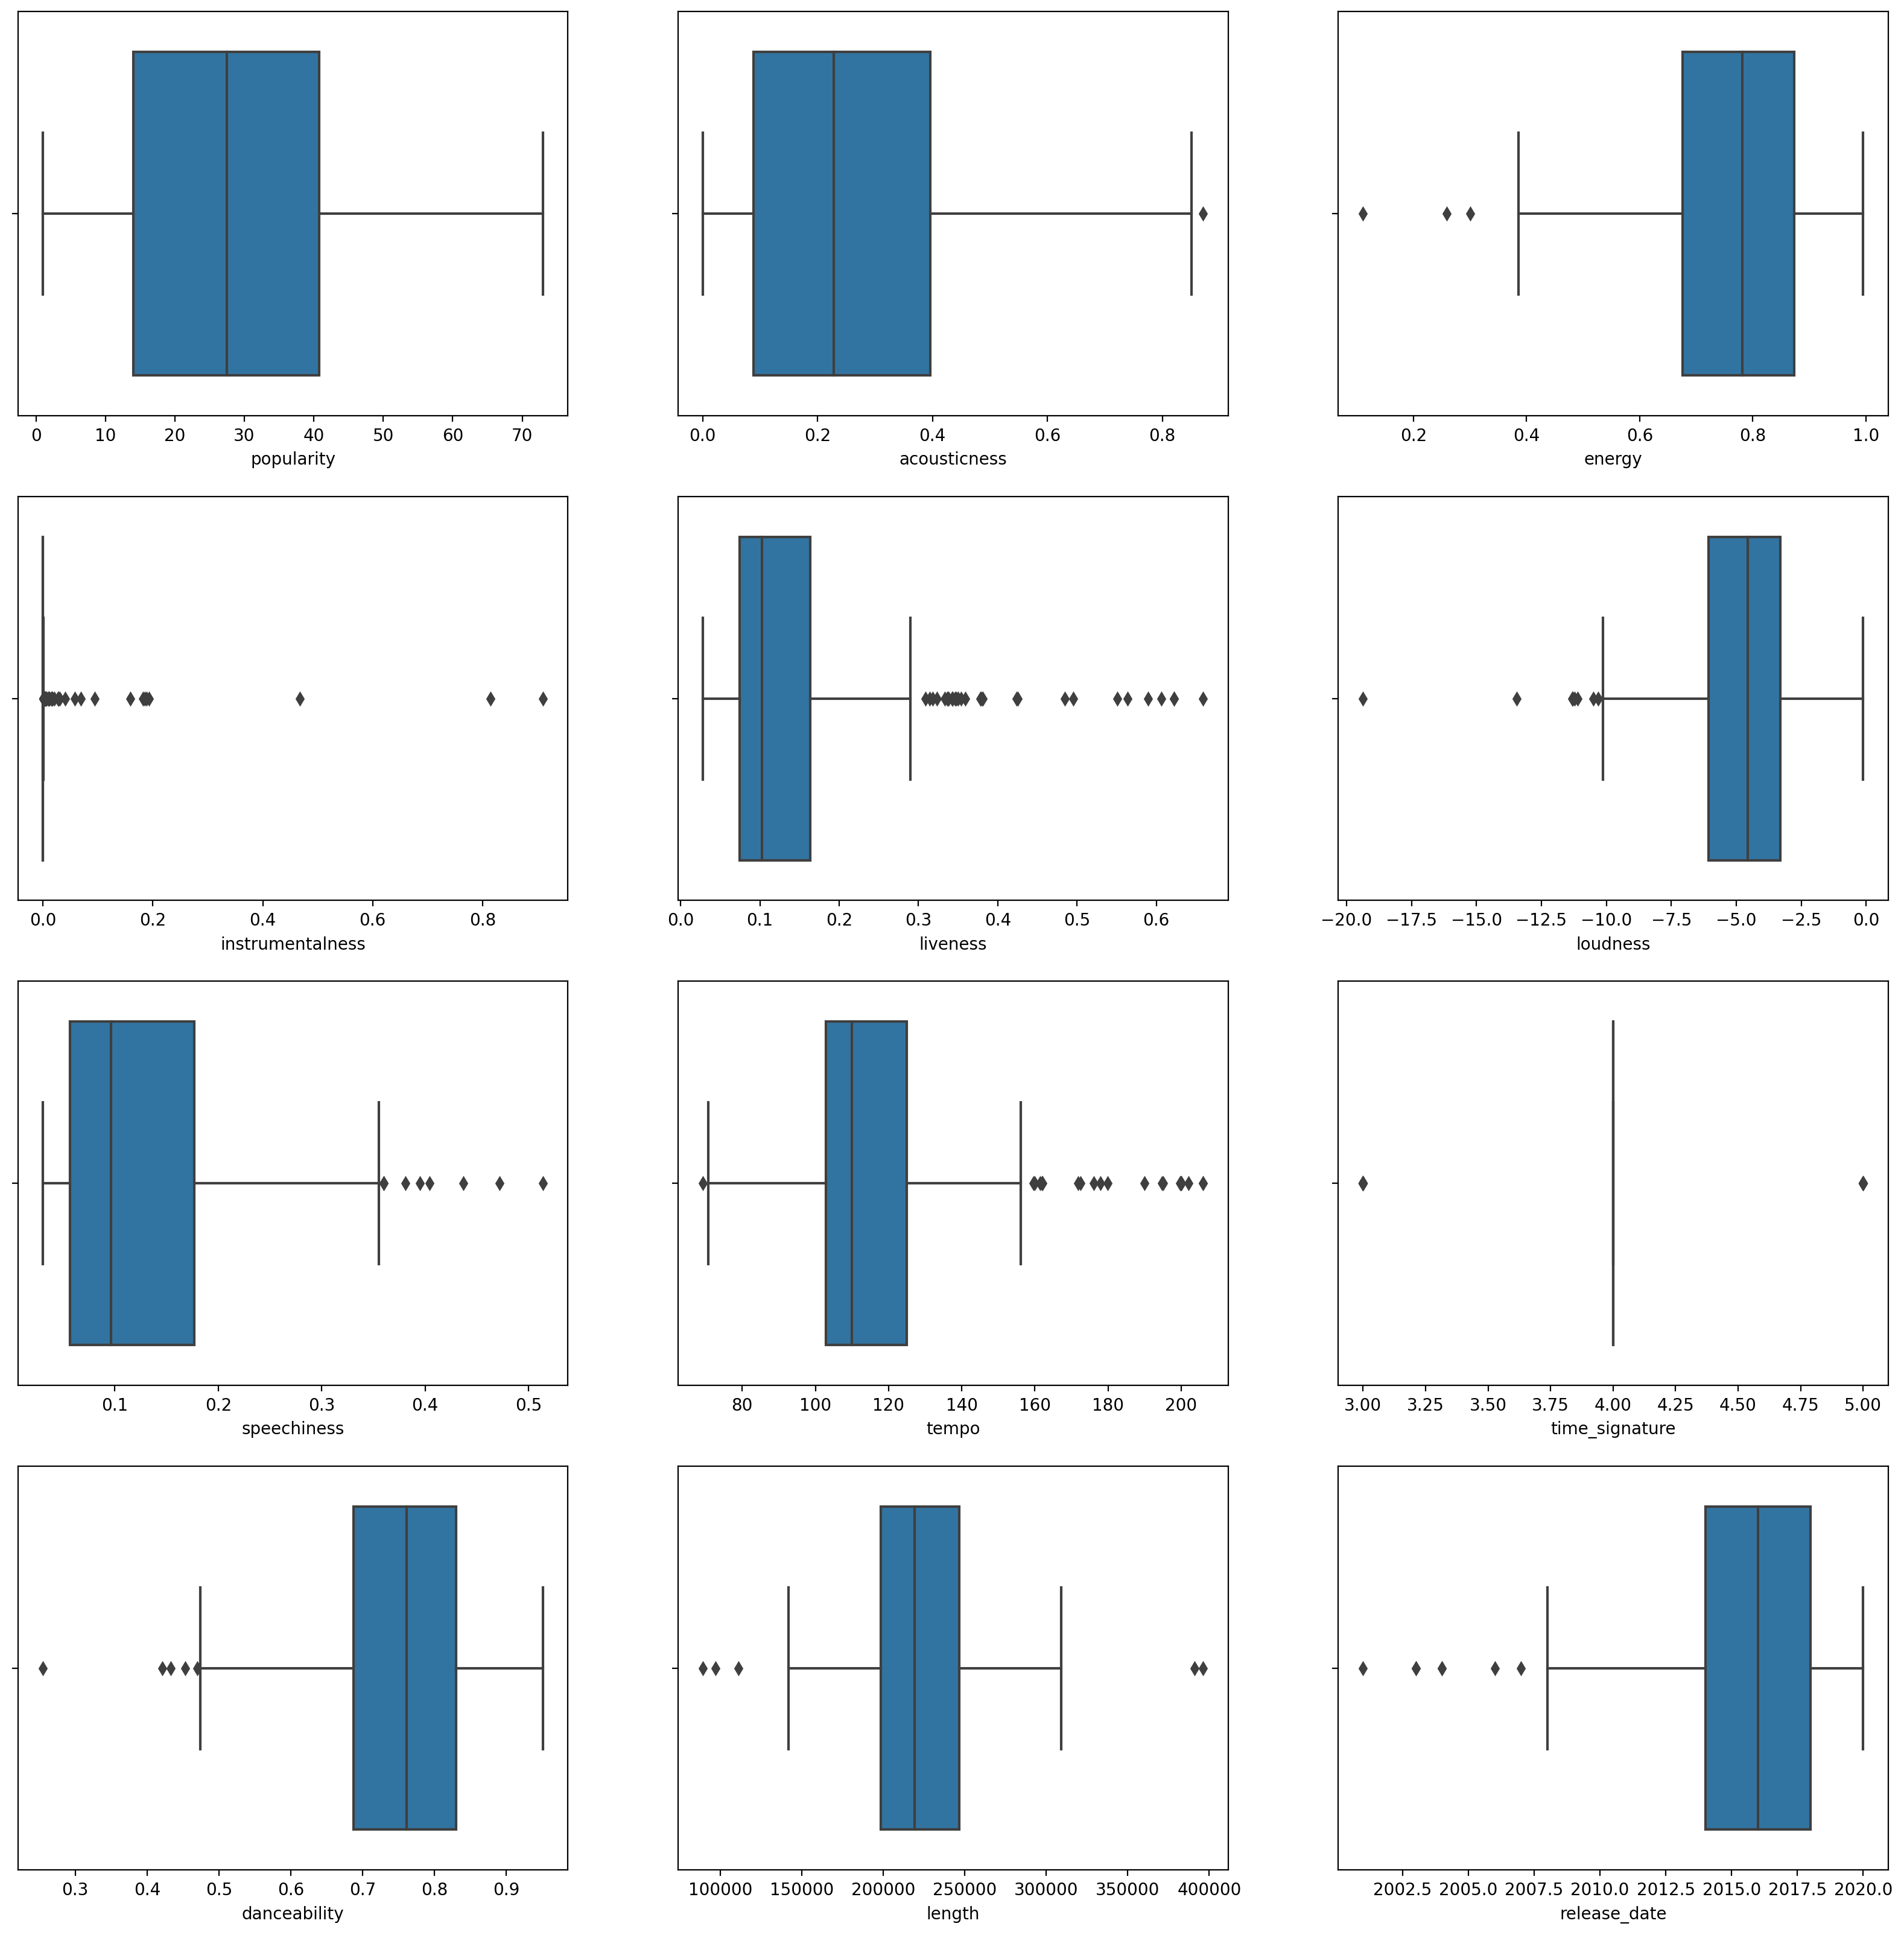

In [5]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

This data is a little noisy: by observing each column as a boxplot, you can see outliers.

We could go through the dataset and remove these outliers, but that would make the data pretty minimal.

1. For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the **artist_top_genre** column as numeric data:

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

2. Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3:



In [7]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

c:\Users\hp\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1])

You see an array printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.

- Use this array to calculate a 'silhouette score':

In [8]:

from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

# Silhouette score
Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.source.

Our score is .53, so right in the middle. This indicates that our data is not particularly well-suited to this type of clustering, but let's continue

# Build a model
Import KMeans and start the clustering process

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

ðŸŽ“ range: These are the iterations of the clustering process

ðŸŽ“ random_state: "Determines random number generation for centroid initialization."[source](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

ðŸŽ“ WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid.[source](https://medium.com/@ODSC/unsupervised-learning-evaluating-clusters-bd47eed175ce).

ðŸŽ“ Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are."[source](https://scikit-learn.org/stable/modules/clustering.html). The value is appended to the wcss variable on each iteration.

ðŸŽ“ k-means++: In [Scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#k-means) you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

# Elbow method
Previously, you surmised that, because you have targeted 3 song genres, you should choose 3 clusters. But is that the case?

1. Use the 'elbow method' to make sure.

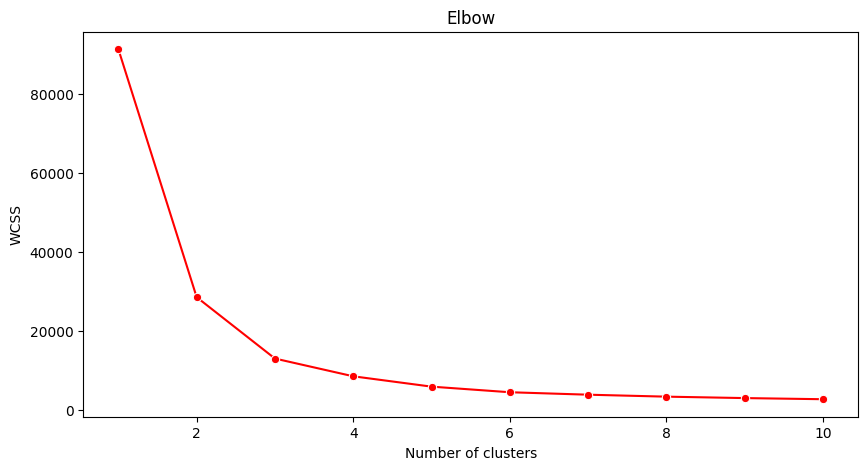

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(x= range(1, 11),y= wcss, marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Display the clusters
1. Try the process again, this time setting three clusters, and display the clusters as a scatterplot:


c:\Users\hp\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


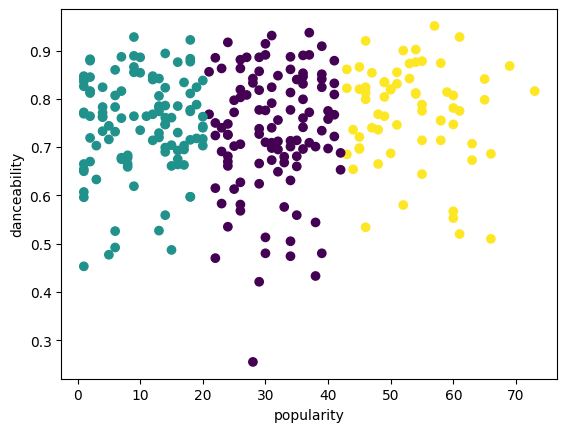

In [13]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

2. Check the model's accuracy:

In [14]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 109 out of 286 samples were correctly labeled.
Accuracy score: 0.38


This model's accuracy is not very good, and the shape of the clusters gives you a hint why.

This data is too imbalanced, too little correlated and there is too much variance between the column values to cluster well. In fact, the clusters that form are probably heavily influenced or skewed by the three genre categories we defined above. That was a learning process!


# Variance
Variance is defined as "the average of the squared differences from the Mean" source. In the context of this clustering problem, it refers to data that the numbers of our dataset tend to diverge a bit too much from the mean